https://www.kaggle.com/code/meenaaa/cancer-death-rate-xgboost/notebook

https://www.researchgate.net/publication/341042405_On_linear_regression_models_with_hierarchical_categorical_variables

In [13]:
!pip install optuna

In [14]:
# data wrangling tools
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# statistical analysis
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# scikit-learn
from sklearn.model_selection import train_test_split

import time

In [15]:
import numpy as np
import pandas as pd
import optuna
from optuna.integration import TFKerasPruningCallback
from optuna.trial import TrialState
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_contour
import matplotlib.pyplot as plt
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras.layers import *
# from tensorflow.keras import *
# from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras.callbacks import LearningRateScheduler
# from tensorflow.keras.optimizers.schedules import ExponentialDecay
# from pickle import load

In [16]:
import warnings
warnings.filterwarnings("ignore")

In [17]:
trainset = pd.read_csv("G:/My Drive/DataMining/POC/LungCancer/Dataset/Transform/trainset.csv", index_col = 0)
trainset.head(5)

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,...,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,City,State,Region,Division,TARGET_deathRate
Geography,,,,,,,,,,,,,,,,,,,,,
"Greene County, North Carolina",0.083439,0.122371,0.291870,0.133236,0.846543,0.0,0.5344,0,0.494915,0.592934,...,0.055978,1.000000,0.478172,0.891040,0.407456,603,33,2,6,0.648195
"McHenry County, Illinois",1.000000,1.000000,1.000000,1.000000,0.124789,0.0,0.5440,8,0.535593,0.549923,...,0.982636,0.522842,0.886624,0.457204,0.401518,948,13,0,0,0.739132
"Wichita County, Kansas",1.000000,0.009178,0.614898,0.008714,0.279933,0.0,0.4288,6,0.410169,0.559140,...,0.118496,0.574822,0.788191,0.753252,0.388981,1614,16,0,7,0.682701
"Mineral County, Montana",0.024442,0.027533,0.275623,0.022454,0.475548,0.0,1.0000,0,1.000000,0.872504,...,0.061625,0.028026,0.543234,0.355567,0.425932,984,26,3,3,0.913427
"Ohio County, West Virginia",0.254530,0.367113,0.350392,0.277148,0.512648,1.0,0.6720,1,0.640678,0.700461,...,0.317203,0.057158,0.455453,0.347449,0.411415,1085,48,2,6,0.810853


In [18]:
valset = pd.read_csv("G:/My Drive/DataMining/POC/LungCancer/Dataset/Transform/valset.csv", index_col = 0)
valset.head(5)

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,...,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate,City,State,Region,Division
Geography,,,,,,,,,,,,,,,,,,,,,
"Linn County, Oregon",0.563843,0.826004,0.433484,0.785557,0.536256,0.039546,0.5504,3,0.555932,0.556068,...,0.456603,0.244924,0.658341,0.496995,0.418344,0.747251,139,32,3,5
"Champaign County, Illinois",0.653182,0.807648,0.505499,1.108948,0.654300,0.961857,0.2240,4,0.196610,0.258065,...,0.980500,0.193658,0.382380,0.369846,0.306170,0.673636,40,8,0,0
"Saratoga County, New York",0.933418,1.073805,0.982915,1.108948,0.134907,0.126423,0.6240,8,0.627119,0.632873,...,0.885327,0.077846,0.680359,0.482247,0.377763,0.831963,228,27,1,2
"Montmorency County, Michigan",0.069111,0.104015,0.305802,0.055315,0.421585,0.000000,0.9616,1,0.959322,0.987711,...,0.000000,0.067381,0.599090,0.348074,0.487958,0.766196,172,17,0,0
"Barrow County, Georgia",0.231774,0.339579,0.540069,0.489118,0.330523,0.000000,0.4000,5,0.355932,0.427035,...,0.980500,0.391169,0.735752,0.567292,0.436490,0.693934,8,6,2,6


In [19]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2467 entries, Greene County, North Carolina to Van Wert County, Ohio
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              2467 non-null   float64
 1   avgDeathsPerYear         2467 non-null   float64
 2   incidenceRate            2467 non-null   float64
 3   medIncome                2467 non-null   float64
 4   popEst2015               2467 non-null   float64
 5   povertyPercent           2467 non-null   float64
 6   studyPerCap              2467 non-null   float64
 7   binnedInc                2467 non-null   int64  
 8   MedianAge                2467 non-null   float64
 9   MedianAgeMale            2467 non-null   float64
 10  MedianAgeFemale          2467 non-null   float64
 11  AvgHouseholdSize         2467 non-null   float64
 12  PercentMarried           2467 non-null   float64
 13  PctNoHS18_24             2467 non-null

In [20]:
valset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 305 entries, Linn County, Oregon to Macon County, Missouri
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              305 non-null    float64
 1   avgDeathsPerYear         305 non-null    float64
 2   incidenceRate            305 non-null    float64
 3   medIncome                305 non-null    float64
 4   popEst2015               305 non-null    float64
 5   povertyPercent           305 non-null    float64
 6   studyPerCap              305 non-null    float64
 7   binnedInc                305 non-null    int64  
 8   MedianAge                305 non-null    float64
 9   MedianAgeMale            305 non-null    float64
 10  MedianAgeFemale          305 non-null    float64
 11  AvgHouseholdSize         305 non-null    float64
 12  PercentMarried           305 non-null    float64
 13  PctNoHS18_24             305 non-null    float64

In [21]:
X_train = trainset.drop(['TARGET_deathRate'], axis = 1)
y_train = trainset['TARGET_deathRate']

In [22]:
X_val = valset.drop(['TARGET_deathRate'], axis = 1)
y_val = valset['TARGET_deathRate']

In [23]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(2467, 36) (2467,)
(305, 36) (305,)


In [24]:
import joblib
scaler_single_filename = "G:/My Drive/DataMining/POC/LungCancer/local/Model/Scaler/scaler_single.save"
scaler_single = joblib.load(scaler_single_filename) 

# Measure

In [25]:
#evaluation metrics for regression model
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error, r2_score

In [26]:
def deviation_function(y_val, pred):
  deviation = []
  for i in range(0, len(y_val)):
    deviation.append(abs(pred[i] - y_val[i]) / y_val[i])
  return np.array(deviation).mean()

# Linear Regression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [27]:
#linear regression model
import optuna
from sklearn.linear_model import LinearRegression 
import sklearn.model_selection
#Grid search model
# from sklearn.model_selection import GridSearchCV         

In [28]:
def LR_Model(trial):
  fit_intercept = trial.suggest_categorical('fit_intercept', [True, False])
  copy_X = trial.suggest_categorical('copy_X', [True, False])
  lr = LinearRegression(copy_X = copy_X, fit_intercept = fit_intercept)
  score = sklearn.model_selection.cross_val_score(lr, X_train, y_train, cv=3)
  accuracy = score.mean()
  return accuracy

In [29]:
lr_study = optuna.create_study(direction="maximize")
lr_study.optimize(LR_Model, n_trials=4)
print(lr_study.best_trial)

[I 2023-05-10 13:47:18,125] A new study created in memory with name: no-name-6aeb5695-df2f-4bef-a4c4-e652f14c7aa2
[I 2023-05-10 13:47:18,149] Trial 0 finished with value: 0.36875867588867983 and parameters: {'fit_intercept': False, 'copy_X': False}. Best is trial 0 with value: 0.36875867588867983.
[I 2023-05-10 13:47:18,168] Trial 1 finished with value: 0.36887799202341537 and parameters: {'fit_intercept': True, 'copy_X': False}. Best is trial 1 with value: 0.36887799202341537.
[I 2023-05-10 13:47:18,187] Trial 2 finished with value: 0.36887799202341537 and parameters: {'fit_intercept': True, 'copy_X': True}. Best is trial 1 with value: 0.36887799202341537.
[I 2023-05-10 13:47:18,204] Trial 3 finished with value: 0.36875867588867983 and parameters: {'fit_intercept': False, 'copy_X': False}. Best is trial 1 with value: 0.36887799202341537.


FrozenTrial(number=1, state=TrialState.COMPLETE, values=[0.36887799202341537], datetime_start=datetime.datetime(2023, 5, 10, 13, 47, 18, 150139), datetime_complete=datetime.datetime(2023, 5, 10, 13, 47, 18, 168151), params={'fit_intercept': True, 'copy_X': False}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'fit_intercept': CategoricalDistribution(choices=(True, False)), 'copy_X': CategoricalDistribution(choices=(True, False))}, trial_id=1, value=None)


In [30]:
plot_optimization_history(lr_study)

In [31]:
lr_study.best_trial.params

{'fit_intercept': True, 'copy_X': False}

https://stackoverflow.com/questions/19201290/how-to-save-a-dictionary-to-a-file

In [32]:
np.save(f"G:/My Drive/DataMining/POC/LungCancer/local/Parameter/Transform/lr_parameter.npy", lr_study.best_trial.params)

In [33]:
lr = LinearRegression(**lr_study.best_trial.params)


In [34]:
#training the model
lr_model = lr.fit(X_train,y_train) 
lr_pred = lr_model.predict(X_val)

## Evaluate

In [35]:
y_val_inv = scaler_single.inverse_transform(np.array(y_val).reshape(1, -1))
lr_pred_inv = scaler_single.inverse_transform(np.array(lr_pred).reshape(1, -1))

In [36]:
#evaluating the model with the following metrics
#mean squared error
lr_mse=mean_squared_error(lr_pred_inv[0], y_val_inv[0])     
#mean absolute error     
lr_mae=mean_absolute_error(lr_pred_inv[0], y_val_inv[0])  
#root mean squared error      
lr_rmse=np.sqrt(mean_squared_error(lr_pred_inv[0], y_val_inv[0]))
#r2 score
lr_r2 = r2_score(lr_pred_inv[0], y_val_inv[0])
print(f'mse: {lr_mse}')
print(f'mae: {lr_mae}')
print(f'rmse: {lr_rmse}')
print(f"R-Squared: {lr_r2}")

mse: 1187.5481940370523
mae: 26.299446695563617
rmse: 34.460821145716366
R-Squared: -0.8341442147415892


In [37]:
lr_df =pd.DataFrame({"mse": lr_mse,"mae": lr_mae,"rmse": lr_rmse, "r2": lr_r2, "deviation": deviation_function(lr_pred_inv[0], y_val_inv[0])},index=['Linear Regression'])

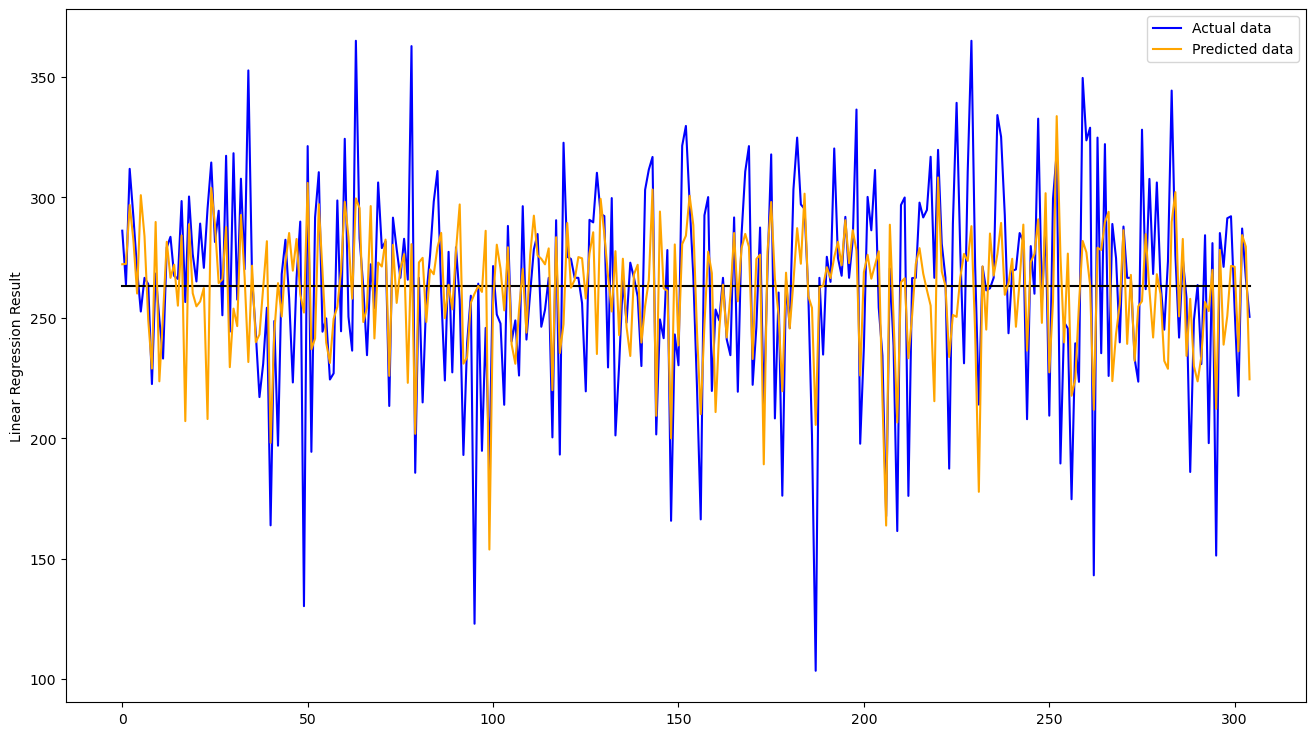

In [38]:
Axis = [y_val_inv[0].mean()] * len(y_val_inv[0])
plt.figure(figsize=(16, 9))
plt.ylabel('Linear Regression Result')
plt.plot(y_val_inv[0], 'blue', label='Actual data')
plt.plot(Axis, color="black")
plt.plot(lr_pred_inv[0], 'orange', label='Predicted data')
plt.legend()

# Decision Tree Regression

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [39]:
# decision tree regression model
from sklearn.tree import DecisionTreeRegressor             

In [40]:
def DTR_Model(trial):
  criterion = trial.suggest_categorical('criterion', ["squared_error", "friedman_mse", "absolute_error", "poisson"])
  splitter = trial.suggest_categorical('splitter', ["best", "random"])
  max_features = trial.suggest_categorical('max_features', ["auto", "sqrt", "log2", None])
  dtr = DecisionTreeRegressor(criterion=criterion, max_features = max_features, splitter = splitter)
  
  score = sklearn.model_selection.cross_val_score(dtr, X_train, y_train, cv=3)
  accuracy = score.mean()
  return accuracy

In [41]:
dtr_study = optuna.create_study(direction="maximize")
dtr_study.optimize(DTR_Model, n_trials=32)
print(dtr_study.best_trial)

[I 2023-05-10 13:47:19,047] A new study created in memory with name: no-name-cf83942d-7d1c-4640-8831-b838fc61515d
[I 2023-05-10 13:47:19,075] Trial 0 finished with value: -0.3672717452124156 and parameters: {'criterion': 'friedman_mse', 'splitter': 'random', 'max_features': 'log2'}. Best is trial 0 with value: -0.3672717452124156.
[I 2023-05-10 13:47:19,752] Trial 1 finished with value: -0.20962527726891014 and parameters: {'criterion': 'absolute_error', 'splitter': 'random', 'max_features': 'auto'}. Best is trial 1 with value: -0.20962527726891014.
[I 2023-05-10 13:47:19,799] Trial 2 finished with value: -0.2370460976759962 and parameters: {'criterion': 'poisson', 'splitter': 'best', 'max_features': 'sqrt'}. Best is trial 1 with value: -0.20962527726891014.
[I 2023-05-10 13:47:19,820] Trial 3 finished with value: -0.5257592942244295 and parameters: {'criterion': 'squared_error', 'splitter': 'random', 'max_features': 'sqrt'}. Best is trial 1 with value: -0.20962527726891014.
[I 2023-05

FrozenTrial(number=22, state=TrialState.COMPLETE, values=[-0.1607631897099507], datetime_start=datetime.datetime(2023, 5, 10, 13, 47, 22, 491168), datetime_complete=datetime.datetime(2023, 5, 10, 13, 47, 22, 528252), params={'criterion': 'friedman_mse', 'splitter': 'random', 'max_features': None}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'criterion': CategoricalDistribution(choices=('squared_error', 'friedman_mse', 'absolute_error', 'poisson')), 'splitter': CategoricalDistribution(choices=('best', 'random')), 'max_features': CategoricalDistribution(choices=('auto', 'sqrt', 'log2', None))}, trial_id=22, value=None)


In [42]:
plot_optimization_history(dtr_study)

In [43]:
dtr_study.best_trial.params

{'criterion': 'friedman_mse', 'splitter': 'random', 'max_features': None}

https://stackoverflow.com/questions/19201290/how-to-save-a-dictionary-to-a-file

In [44]:
np.save(f"G:/My Drive/DataMining/POC/LungCancer/local/Parameter/Transform/dtr_parameter.npy", dtr_study.best_trial.params)

In [45]:
dtr = DecisionTreeRegressor(**dtr_study.best_trial.params)

In [46]:
#training the model
dtr_model = dtr.fit(X_train,y_train) 
dtr_pred = dtr_model.predict(X_val)

## Evaluate

In [47]:
y_val_inv = scaler_single.inverse_transform(np.array(y_val).reshape(1, -1))
dtr_pred_inv = scaler_single.inverse_transform(np.array(dtr_pred).reshape(1, -1))

In [48]:
#evaluating the model with the following metrics
#mean squared error
dtr_mse=mean_squared_error(dtr_pred_inv[0], y_val_inv[0])     
#mean absolute error     
dtr_mae=mean_absolute_error(dtr_pred_inv[0], y_val_inv[0])  
#root mean squared error      
dtr_rmse=np.sqrt(mean_squared_error(dtr_pred_inv[0], y_val_inv[0]))
#r2 score
dtr_r2 = r2_score(dtr_pred_inv[0], y_val_inv[0])
print(f'mse: {dtr_mse}')
print(f'mae: {dtr_mae}')
print(f'rmse: {dtr_rmse}')
print(f"R-Squared: {dtr_r2}")


mse: 2548.8240039951734
mae: 37.37792589170988
rmse: 50.485879253462286
R-Squared: -0.188114576349234


In [49]:
dtr_df =pd.DataFrame({"mse": dtr_mse,"mae": dtr_mae,"rmse": dtr_rmse, "r2": dtr_r2, "deviation": deviation_function(y_val_inv[0], dtr_pred_inv[0])},index=['Decision Tree Regression'])

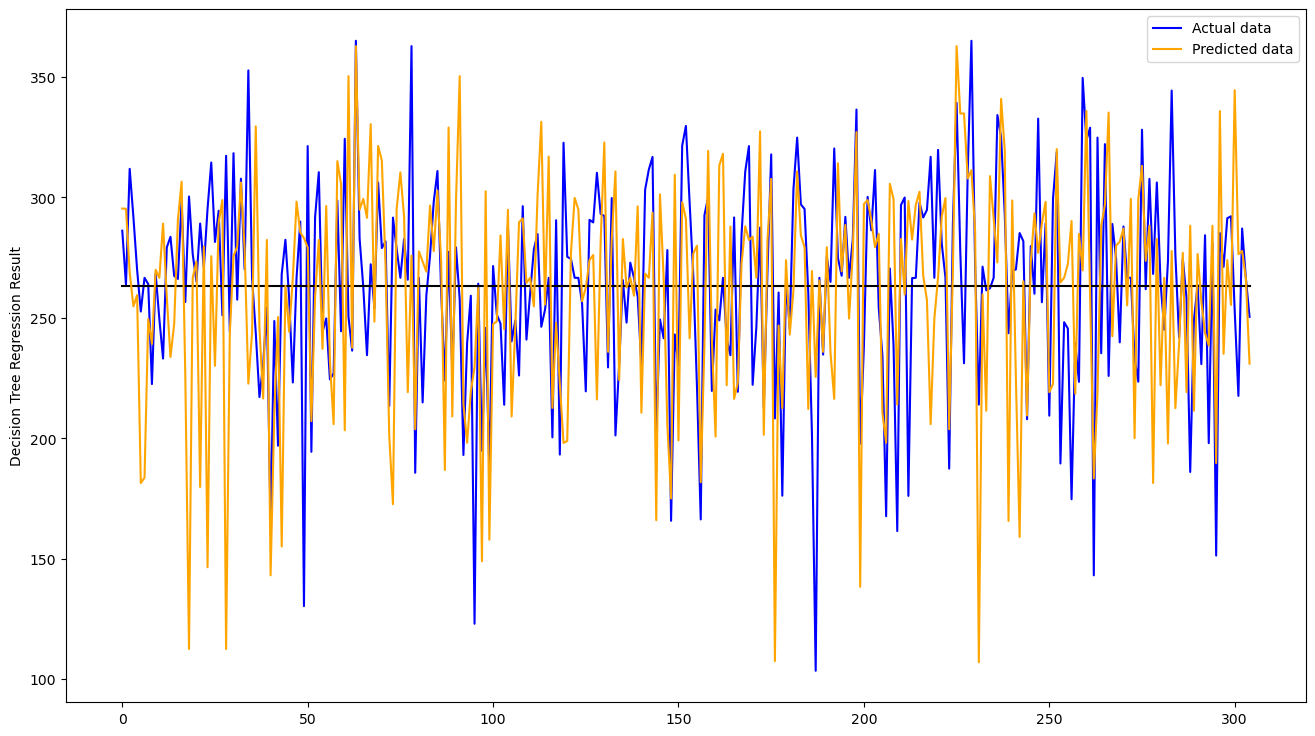

In [50]:
Axis = [y_val_inv[0].mean()] * len(y_val_inv[0])
plt.figure(figsize=(16, 9))
plt.ylabel('Decision Tree Regression Result')
plt.plot(y_val_inv[0], 'blue', label='Actual data')
plt.plot(Axis, color="black")
plt.plot(dtr_pred_inv[0], 'orange', label='Predicted data')
plt.legend()

# Random Forest Regression

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [51]:
# random forest regression model
from sklearn.ensemble import RandomForestRegressor             

In [52]:
def RFR_Model(trial):
  criterion = trial.suggest_categorical('criterion', ["squared_error", "friedman_mse", "absolute_error", "poisson"])
  max_features = trial.suggest_categorical('max_features', [1, "sqrt", "log2", None])
  rfr = RandomForestRegressor(criterion=criterion, max_features = max_features)
  
  score = sklearn.model_selection.cross_val_score(rfr, X_train, y_train, cv=3)
  accuracy = score.mean()
  return accuracy

In [53]:
rfr_study = optuna.create_study(direction="maximize")
rfr_study.optimize(RFR_Model, n_trials=16)
print(rfr_study.best_trial)

[I 2023-05-10 13:47:24,264] A new study created in memory with name: no-name-ccbab032-63af-4f16-991e-6315f3bf9ea2
[I 2023-05-10 13:48:40,690] Trial 0 finished with value: 0.42723634918390196 and parameters: {'criterion': 'absolute_error', 'max_features': None}. Best is trial 0 with value: 0.42723634918390196.
[I 2023-05-10 13:48:45,304] Trial 1 finished with value: 0.30216360616287863 and parameters: {'criterion': 'absolute_error', 'max_features': 1}. Best is trial 0 with value: 0.42723634918390196.
[I 2023-05-10 13:48:55,683] Trial 2 finished with value: 0.43295719310621933 and parameters: {'criterion': 'friedman_mse', 'max_features': None}. Best is trial 2 with value: 0.43295719310621933.
[I 2023-05-10 13:49:11,546] Trial 3 finished with value: 0.3994215963456726 and parameters: {'criterion': 'absolute_error', 'max_features': 'sqrt'}. Best is trial 2 with value: 0.43295719310621933.
[I 2023-05-10 13:49:25,424] Trial 4 finished with value: 0.3923404285704488 and parameters: {'criterio

FrozenTrial(number=13, state=TrialState.COMPLETE, values=[0.4368411489709397], datetime_start=datetime.datetime(2023, 5, 10, 13, 51, 32, 395966), datetime_complete=datetime.datetime(2023, 5, 10, 13, 51, 43, 240128), params={'criterion': 'friedman_mse', 'max_features': None}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'criterion': CategoricalDistribution(choices=('squared_error', 'friedman_mse', 'absolute_error', 'poisson')), 'max_features': CategoricalDistribution(choices=(1, 'sqrt', 'log2', None))}, trial_id=13, value=None)


In [54]:
plot_optimization_history(rfr_study)

In [55]:
rfr_study.best_trial.params

{'criterion': 'friedman_mse', 'max_features': None}

In [56]:
np.save(f"G:/My Drive/DataMining/POC/LungCancer/local/Parameter/Transform/rfr_parameter.npy", rfr_study.best_trial.params)

https://stackoverflow.com/questions/19201290/how-to-save-a-dictionary-to-a-file

In [57]:
rfr = RandomForestRegressor(**rfr_study.best_trial.params)

In [58]:
#training the model
rfr_model = rfr.fit(X_train,y_train) 
rfr_pred = rfr_model.predict(X_val)

## Evaluate

In [59]:
y_val_inv = scaler_single.inverse_transform(np.array(y_val).reshape(1, -1))
rfr_pred_inv = scaler_single.inverse_transform(np.array(rfr_pred).reshape(1, -1))

In [60]:
#evaluating the model with the following metrics
#mean squared error
rfr_mse=mean_squared_error(rfr_pred_inv[0], y_val_inv[0])     
#mean absolute error     
rfr_mae=mean_absolute_error(rfr_pred_inv[0], y_val_inv[0])  
#root mean squared error      
rfr_rmse=np.sqrt(mean_squared_error(rfr_pred_inv[0], y_val_inv[0]))
#r2 score
rfr_r2 = r2_score(rfr_pred_inv[0], y_val_inv[0])
print(f'mse: {rfr_mse}')
print(f'mae: {rfr_mae}')
print(f'rmse: {rfr_rmse}')
print(f"R-Squared: {rfr_r2}")


mse: 984.6970371045187
mae: 23.78902059970479
rmse: 31.379882681497055
R-Squared: -0.6280928942457145


In [61]:
rfr_df =pd.DataFrame({"mse": rfr_mse,"mae": rfr_mae,"rmse": rfr_rmse, "r2": rfr_r2, "deviation": deviation_function(rfr_pred_inv[0], y_val_inv[0])},index=['Random Forest Regression'])

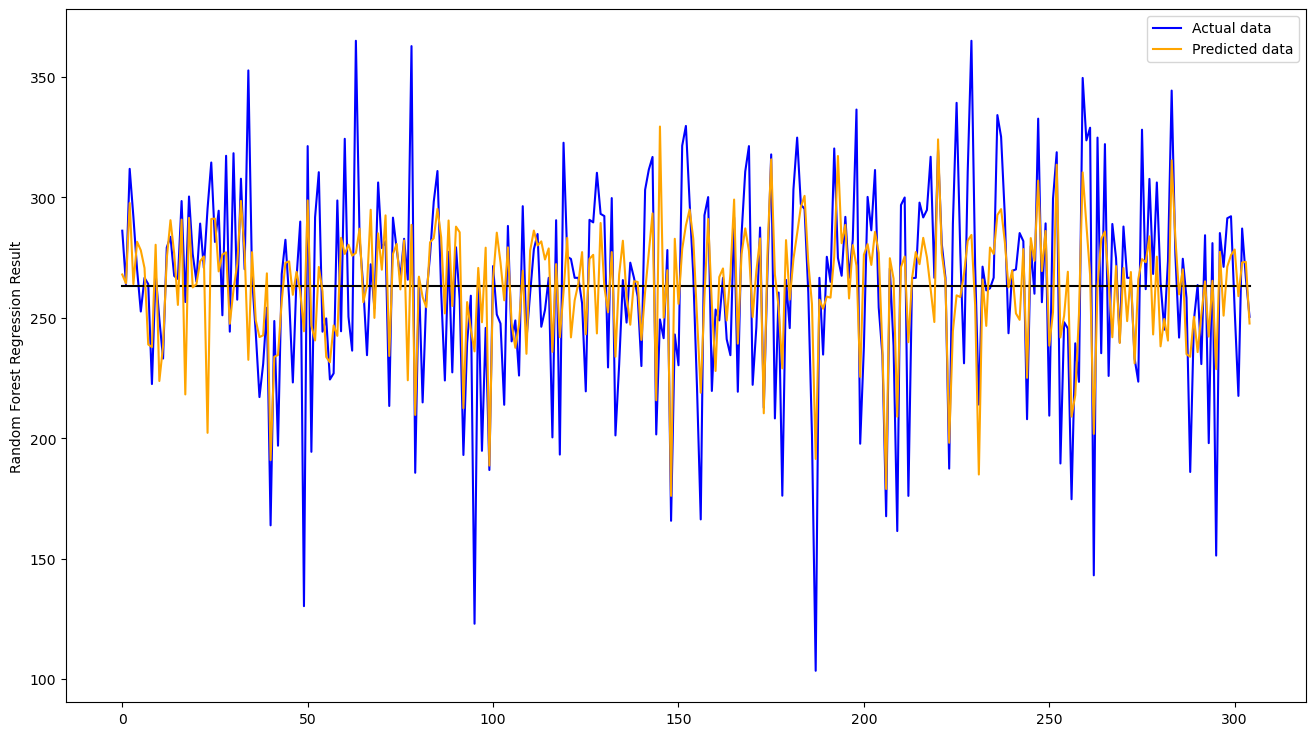

In [62]:
Axis = [y_val_inv[0].mean()] * len(y_val_inv[0])
plt.figure(figsize=(16, 9))
plt.ylabel('Random Forest Regression Result')
plt.plot(y_val_inv[0], 'blue', label='Actual data')
plt.plot(Axis, color="black")
plt.plot(rfr_pred_inv[0], 'orange', label='Predicted data')
plt.legend()


# XGBoost Regression

https://stackabuse.com/bytes/end-to-end-xgboost-regression-pipeline-with-scikit-learn/

https://xgboost.readthedocs.io/

In [63]:
# pip install xgboost

In [64]:
# xgboost model
from xgboost import XGBRegressor            

In [65]:
def XGBR_Model(trial):
  booster = trial.suggest_categorical('booster', ["gbtree", "gblinear", "dart"])
  grow_policy = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])
  gamma = trial.suggest_float("gamma", 0.1, 1.0, step=0.1)
  max_depth = trial.suggest_int("max_depth", 1, 20, step=1)
  n_estimators = trial.suggest_int("max_depth", 500, 3000, step=500)
  learning_rate = trial.suggest_float("learning_rate", 0.1, 1, step=0.1)
  xgbr = XGBRegressor(booster = booster, grow_policy = grow_policy, gamma = gamma, max_depth = max_depth, n_estimators = n_estimators, learning_rate = learning_rate)
  score = sklearn.model_selection.cross_val_score(xgbr, X_train, y_train, cv=3)
  accuracy = score.mean()
  return accuracy

In [66]:
xgbr_study = optuna.create_study(direction="maximize")
xgbr_study.optimize(XGBR_Model, n_trials=1000)
print(xgbr_study.best_trial)

[I 2023-05-10 13:52:11,012] A new study created in memory with name: no-name-cbddbc3c-2b3d-472c-bfbb-11513ea91c2d
[I 2023-05-10 13:52:11,421] Trial 0 finished with value: 0.2711604578836336 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 1.0, 'max_depth': 15, 'learning_rate': 0.5}. Best is trial 0 with value: 0.2711604578836336.
[I 2023-05-10 13:52:11,471] Trial 1 finished with value: 0.020979230269697686 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 4, 'learning_rate': 0.2}. Best is trial 0 with value: 0.2711604578836336.
[I 2023-05-10 13:52:11,508] Trial 2 finished with value: 0.22436522570912854 and parameters: {'booster': 'gbtree', 'grow_policy': 'lossguide', 'gamma': 0.4, 'max_depth': 2, 'learning_rate': 0.7000000000000001}. Best is trial 0 with value: 0.2711604578836336.
[I 2023-05-10 13:52:11,572] Trial 3 finished with value: 0.2456256087696661 and parameters: {'booster': 'dart', 'grow_policy': 'lossguide', 'g

[13:52:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[13:52:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[13:52:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[13:52:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[13:52:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\

[I 2023-05-10 13:52:12,046] Trial 7 finished with value: 0.2712034131826247 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.9, 'max_depth': 13, 'learning_rate': 0.5}. Best is trial 7 with value: 0.2712034131826247.
[I 2023-05-10 13:52:12,093] Trial 8 finished with value: -3.7115484221129144e+16 and parameters: {'booster': 'gblinear', 'grow_policy': 'depthwise', 'gamma': 0.8, 'max_depth': 16, 'learning_rate': 0.6}. Best is trial 7 with value: 0.2712034131826247.


[13:52:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[13:52:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[13:52:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.



[I 2023-05-10 13:52:12,505] Trial 9 finished with value: 0.24562690471481333 and parameters: {'booster': 'dart', 'grow_policy': 'lossguide', 'gamma': 1.0, 'max_depth': 15, 'learning_rate': 0.8}. Best is trial 7 with value: 0.2712034131826247.
[I 2023-05-10 13:52:13,133] Trial 10 finished with value: 0.2897806377068101 and parameters: {'booster': 'gbtree', 'grow_policy': 'depthwise', 'gamma': 0.5, 'max_depth': 20, 'learning_rate': 1.0}. Best is trial 10 with value: 0.2897806377068101.
[I 2023-05-10 13:52:13,714] Trial 11 finished with value: 0.2897806377068101 and parameters: {'booster': 'gbtree', 'grow_policy': 'depthwise', 'gamma': 0.5, 'max_depth': 20, 'learning_rate': 1.0}. Best is trial 10 with value: 0.2897806377068101.
[I 2023-05-10 13:52:14,299] Trial 12 finished with value: 0.2897806377068101 and parameters: {'booster': 'gbtree', 'grow_policy': 'depthwise', 'gamma': 0.5, 'max_depth': 20, 'learning_rate': 1.0}. Best is trial 10 with value: 0.2897806377068101.
[I 2023-05-10 13:52

[13:52:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[13:52:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[13:52:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.



[I 2023-05-10 13:52:17,382] Trial 30 finished with value: 0.3071665372068129 and parameters: {'booster': 'dart', 'grow_policy': 'lossguide', 'gamma': 0.6, 'max_depth': 10, 'learning_rate': 0.30000000000000004}. Best is trial 25 with value: 0.3902818139733839.
[I 2023-05-10 13:52:17,471] Trial 31 finished with value: 0.37797395709244047 and parameters: {'booster': 'gbtree', 'grow_policy': 'lossguide', 'gamma': 0.2, 'max_depth': 6, 'learning_rate': 0.5}. Best is trial 25 with value: 0.3902818139733839.
[I 2023-05-10 13:52:17,556] Trial 32 finished with value: 0.36688888678358983 and parameters: {'booster': 'gbtree', 'grow_policy': 'lossguide', 'gamma': 0.1, 'max_depth': 6, 'learning_rate': 0.5}. Best is trial 25 with value: 0.3902818139733839.
[I 2023-05-10 13:52:17,617] Trial 33 finished with value: 0.23077525764880694 and parameters: {'booster': 'gbtree', 'grow_policy': 'lossguide', 'gamma': 0.1, 'max_depth': 3, 'learning_rate': 0.4}. Best is trial 25 with value: 0.3902818139733839.
[I

[13:52:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[13:52:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[13:52:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[13:52:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[13:52:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\

[I 2023-05-10 13:52:18,202] Trial 41 finished with value: 0.36978703342833796 and parameters: {'booster': 'gbtree', 'grow_policy': 'lossguide', 'gamma': 0.2, 'max_depth': 7, 'learning_rate': 0.5}. Best is trial 25 with value: 0.3902818139733839.
[I 2023-05-10 13:52:18,316] Trial 42 finished with value: 0.36978703342833796 and parameters: {'booster': 'gbtree', 'grow_policy': 'lossguide', 'gamma': 0.2, 'max_depth': 7, 'learning_rate': 0.5}. Best is trial 25 with value: 0.3902818139733839.
[I 2023-05-10 13:52:18,438] Trial 43 finished with value: 0.3557313920762701 and parameters: {'booster': 'gbtree', 'grow_policy': 'lossguide', 'gamma': 0.30000000000000004, 'max_depth': 8, 'learning_rate': 0.5}. Best is trial 25 with value: 0.3902818139733839.
[I 2023-05-10 13:52:18,534] Trial 44 finished with value: 0.389944016569922 and parameters: {'booster': 'gbtree', 'grow_policy': 'lossguide', 'gamma': 0.2, 'max_depth': 7, 'learning_rate': 0.4}. Best is trial 25 with value: 0.3902818139733839.
[I 

[13:52:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[13:52:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[13:52:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.



[I 2023-05-10 13:52:19,980] Trial 50 finished with value: 0.3712483972819855 and parameters: {'booster': 'gbtree', 'grow_policy': 'lossguide', 'gamma': 0.30000000000000004, 'max_depth': 12, 'learning_rate': 0.2}. Best is trial 25 with value: 0.3902818139733839.
[I 2023-05-10 13:52:20,266] Trial 51 finished with value: 0.3712483972819855 and parameters: {'booster': 'gbtree', 'grow_policy': 'lossguide', 'gamma': 0.30000000000000004, 'max_depth': 12, 'learning_rate': 0.2}. Best is trial 25 with value: 0.3902818139733839.
[I 2023-05-10 13:52:20,653] Trial 52 finished with value: 0.39685906565594303 and parameters: {'booster': 'gbtree', 'grow_policy': 'lossguide', 'gamma': 0.2, 'max_depth': 16, 'learning_rate': 0.2}. Best is trial 52 with value: 0.39685906565594303.
[I 2023-05-10 13:52:21,064] Trial 53 finished with value: 0.32489525092557897 and parameters: {'booster': 'gbtree', 'grow_policy': 'lossguide', 'gamma': 0.2, 'max_depth': 17, 'learning_rate': 0.1}. Best is trial 52 with value: 0

[13:53:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[13:53:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[13:53:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.



[I 2023-05-10 13:53:04,965] Trial 110 finished with value: 0.3980964824361701 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 73 with value: 0.41488662826387124.
[I 2023-05-10 13:53:06,076] Trial 111 finished with value: 0.41488662826387124 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 73 with value: 0.41488662826387124.
[I 2023-05-10 13:53:07,131] Trial 112 finished with value: 0.41488662826387124 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 73 with value: 0.41488662826387124.
[I 2023-05-10 13:53:08,100] Trial 113 finished with value: 0.4147412646102731 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 19, 'learning_rate': 0.2}. Best is trial 73 with value: 0.41488662826387124.
[I 2023-05-10 

[13:53:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[13:53:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[13:53:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.



[I 2023-05-10 13:53:22,058] Trial 126 finished with value: 0.41488662826387124 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 73 with value: 0.41488662826387124.
[I 2023-05-10 13:53:23,126] Trial 127 finished with value: 0.39214873707719144 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 19, 'learning_rate': 0.30000000000000004}. Best is trial 73 with value: 0.41488662826387124.
[I 2023-05-10 13:53:24,246] Trial 128 finished with value: 0.37955285560947366 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 20, 'learning_rate': 0.1}. Best is trial 73 with value: 0.41488662826387124.
[I 2023-05-10 13:53:25,360] Trial 129 finished with value: 0.3980964824361701 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 73 with value: 0.4148866282638712

[13:53:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[13:53:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[13:53:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.



[I 2023-05-10 13:53:56,188] Trial 148 finished with value: 0.4147412646102731 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 19, 'learning_rate': 0.2}. Best is trial 73 with value: 0.41488662826387124.
[I 2023-05-10 13:53:57,985] Trial 149 finished with value: 0.39214873707719144 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 19, 'learning_rate': 0.30000000000000004}. Best is trial 73 with value: 0.41488662826387124.
[I 2023-05-10 13:53:59,753] Trial 150 finished with value: 0.41430405067544057 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 20, 'learning_rate': 0.30000000000000004}. Best is trial 73 with value: 0.41488662826387124.
[I 2023-05-10 13:54:01,414] Trial 151 finished with value: 0.41488662826387124 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 73 with value: 0.

[13:54:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[13:54:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[13:54:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.



[I 2023-05-10 13:54:27,899] Trial 169 finished with value: 0.39794064426219294 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 19, 'learning_rate': 0.2}. Best is trial 73 with value: 0.41488662826387124.
[I 2023-05-10 13:54:29,486] Trial 170 finished with value: 0.260464058744685 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.7000000000000001, 'max_depth': 20, 'learning_rate': 0.9}. Best is trial 73 with value: 0.41488662826387124.
[I 2023-05-10 13:54:31,014] Trial 171 finished with value: 0.41488662826387124 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 73 with value: 0.41488662826387124.
[I 2023-05-10 13:54:32,557] Trial 172 finished with value: 0.27869086829062334 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 20, 'learning_rate': 0.8}. Best is trial 73 with value: 0.41488662826387124.

[13:55:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[13:55:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[13:55:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.



[I 2023-05-10 13:55:14,553] Trial 199 finished with value: 0.37955285560947366 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 20, 'learning_rate': 0.1}. Best is trial 73 with value: 0.41488662826387124.
[I 2023-05-10 13:55:16,171] Trial 200 finished with value: 0.39794064426219294 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 19, 'learning_rate': 0.2}. Best is trial 73 with value: 0.41488662826387124.
[I 2023-05-10 13:55:17,871] Trial 201 finished with value: 0.41488662826387124 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 73 with value: 0.41488662826387124.
[I 2023-05-10 13:55:19,485] Trial 202 finished with value: 0.41488662826387124 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 73 with value: 0.41488662826387124.
[I 2023-05-1

[13:56:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[13:56:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[13:56:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.



[I 2023-05-10 13:56:06,408] Trial 231 finished with value: 0.41488662826387124 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 73 with value: 0.41488662826387124.
[I 2023-05-10 13:56:08,011] Trial 232 finished with value: 0.41488662826387124 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 73 with value: 0.41488662826387124.
[I 2023-05-10 13:56:09,563] Trial 233 finished with value: 0.3183935762382909 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 20, 'learning_rate': 0.7000000000000001}. Best is trial 73 with value: 0.41488662826387124.
[I 2023-05-10 13:56:11,203] Trial 234 finished with value: 0.41488662826387124 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 73 with value: 0.41488662826387124

[13:56:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[13:56:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[13:56:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.



[I 2023-05-10 13:56:53,480] Trial 260 finished with value: 0.37055298993274216 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 19, 'learning_rate': 0.1}. Best is trial 73 with value: 0.41488662826387124.
[I 2023-05-10 13:56:53,603] Trial 261 finished with value: -0.48203874609396996 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 2, 'learning_rate': 0.2}. Best is trial 73 with value: 0.41488662826387124.
[I 2023-05-10 13:56:54,224] Trial 262 finished with value: 0.3909854672614063 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 11, 'learning_rate': 0.2}. Best is trial 73 with value: 0.41488662826387124.
[I 2023-05-10 13:56:55,742] Trial 263 finished with value: 0.41488662826387124 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 73 with value: 0.41488662826387124.
[I 2023-05-10

[13:57:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[13:57:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[13:57:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.



[I 2023-05-10 13:57:23,896] Trial 282 finished with value: 0.37055298993274216 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 19, 'learning_rate': 0.1}. Best is trial 73 with value: 0.41488662826387124.
[I 2023-05-10 13:57:24,375] Trial 283 finished with value: 0.24154125659046388 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.9, 'max_depth': 10, 'learning_rate': 0.2}. Best is trial 73 with value: 0.41488662826387124.
[I 2023-05-10 13:57:26,186] Trial 284 finished with value: 0.41488662826387124 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 73 with value: 0.41488662826387124.
[I 2023-05-10 13:57:28,006] Trial 285 finished with value: 0.31544457935938575 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.5, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 73 with value: 0.41488662826387124.
[I 2023-05-1

[13:57:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[13:57:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[13:57:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.



[I 2023-05-10 13:58:00,631] Trial 302 finished with value: 0.37955285560947366 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 20, 'learning_rate': 0.1}. Best is trial 73 with value: 0.41488662826387124.
[I 2023-05-10 13:58:02,261] Trial 303 finished with value: 0.4147412646102731 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 19, 'learning_rate': 0.2}. Best is trial 73 with value: 0.41488662826387124.
[I 2023-05-10 13:58:03,925] Trial 304 finished with value: 0.4145241189542872 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 18, 'learning_rate': 0.2}. Best is trial 73 with value: 0.41488662826387124.
[I 2023-05-10 13:58:05,816] Trial 305 finished with value: 0.41488662826387124 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 73 with value: 0.41488662826387124.
[I 2023-05-10 

[13:58:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[13:58:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[13:58:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.



[I 2023-05-10 13:58:36,569] Trial 323 finished with value: 0.3612476052836186 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 20, 'learning_rate': 0.1}. Best is trial 73 with value: 0.41488662826387124.
[I 2023-05-10 13:58:38,543] Trial 324 finished with value: 0.4147412646102731 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 19, 'learning_rate': 0.2}. Best is trial 73 with value: 0.41488662826387124.
[I 2023-05-10 13:58:40,379] Trial 325 finished with value: 0.41488662826387124 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 73 with value: 0.41488662826387124.
[I 2023-05-10 13:58:42,117] Trial 326 finished with value: 0.4147412646102731 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 19, 'learning_rate': 0.2}. Best is trial 73 with value: 0.41488662826387124.
[I 2023-05-10 1

[13:59:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[13:59:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[13:59:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.



[I 2023-05-10 13:59:15,663] Trial 345 finished with value: 0.3783270842088266 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.30000000000000004, 'max_depth': 19, 'learning_rate': 0.2}. Best is trial 73 with value: 0.41488662826387124.
[I 2023-05-10 13:59:17,995] Trial 346 finished with value: 0.41430405067544057 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 20, 'learning_rate': 0.30000000000000004}. Best is trial 73 with value: 0.41488662826387124.
[I 2023-05-10 13:59:20,628] Trial 347 finished with value: 0.41488662826387124 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 73 with value: 0.41488662826387124.
[I 2023-05-10 13:59:22,904] Trial 348 finished with value: 0.41488662826387124 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 73 with value: 0.

[13:59:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[13:59:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[13:59:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.



[I 2023-05-10 13:59:46,367] Trial 363 finished with value: 0.26170711253511453 and parameters: {'booster': 'gbtree', 'grow_policy': 'depthwise', 'gamma': 0.8, 'max_depth': 19, 'learning_rate': 0.2}. Best is trial 357 with value: 0.41488663680907284.
[I 2023-05-10 13:59:48,250] Trial 364 finished with value: 0.4143040537700627 and parameters: {'booster': 'gbtree', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 20, 'learning_rate': 0.30000000000000004}. Best is trial 357 with value: 0.41488663680907284.
[I 2023-05-10 13:59:50,246] Trial 365 finished with value: 0.3980964456435545 and parameters: {'booster': 'gbtree', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 357 with value: 0.41488663680907284.
[I 2023-05-10 13:59:52,657] Trial 366 finished with value: 0.41488663680907284 and parameters: {'booster': 'gbtree', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 357 with value: 0.41488

[14:04:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:04:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:04:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.



[I 2023-05-10 14:04:47,356] Trial 538 finished with value: 0.41488663680907284 and parameters: {'booster': 'gbtree', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 357 with value: 0.41488663680907284.
[I 2023-05-10 14:04:49,211] Trial 539 finished with value: 0.37055299351157883 and parameters: {'booster': 'gbtree', 'grow_policy': 'lossguide', 'gamma': 0.1, 'max_depth': 19, 'learning_rate': 0.1}. Best is trial 357 with value: 0.41488663680907284.
[I 2023-05-10 14:04:50,752] Trial 540 finished with value: 0.41488663680907284 and parameters: {'booster': 'gbtree', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 357 with value: 0.41488663680907284.
[I 2023-05-10 14:04:52,509] Trial 541 finished with value: 0.3980964456435545 and parameters: {'booster': 'gbtree', 'grow_policy': 'lossguide', 'gamma': 0.2, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 357 with value: 0.41488663680907284.
[

[14:05:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:05:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:05:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.



[I 2023-05-10 14:05:23,607] Trial 558 finished with value: 0.3980964456435545 and parameters: {'booster': 'gbtree', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 357 with value: 0.41488663680907284.
[I 2023-05-10 14:05:25,090] Trial 559 finished with value: 0.41474126724950633 and parameters: {'booster': 'gbtree', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 19, 'learning_rate': 0.2}. Best is trial 357 with value: 0.41488663680907284.
[I 2023-05-10 14:05:26,784] Trial 560 finished with value: 0.41488663680907284 and parameters: {'booster': 'gbtree', 'grow_policy': 'lossguide', 'gamma': 0.1, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 357 with value: 0.41488663680907284.
[I 2023-05-10 14:05:28,648] Trial 561 finished with value: 0.41429771008026806 and parameters: {'booster': 'gbtree', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 19, 'learning_rate': 0.30000000000000004}. Best is trial 357 with value: 0.4148

[14:05:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:05:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:05:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.



[I 2023-05-10 14:05:57,153] Trial 580 finished with value: 0.41488663680907284 and parameters: {'booster': 'gbtree', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 357 with value: 0.41488663680907284.
[I 2023-05-10 14:05:58,787] Trial 581 finished with value: 0.34913846507615814 and parameters: {'booster': 'gbtree', 'grow_policy': 'lossguide', 'gamma': 0.1, 'max_depth': 20, 'learning_rate': 0.6}. Best is trial 357 with value: 0.41488663680907284.
[I 2023-05-10 14:06:00,355] Trial 582 finished with value: 0.3977111195407339 and parameters: {'booster': 'gbtree', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 18, 'learning_rate': 0.2}. Best is trial 357 with value: 0.41488663680907284.
[I 2023-05-10 14:06:00,590] Trial 583 finished with value: 0.15515176116008159 and parameters: {'booster': 'gbtree', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 5, 'learning_rate': 0.2}. Best is trial 357 with value: 0.41488663680907284.
[I

[14:06:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:06:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:06:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.



[I 2023-05-10 14:06:26,417] Trial 600 finished with value: 0.41488663680907284 and parameters: {'booster': 'gbtree', 'grow_policy': 'lossguide', 'gamma': 0.1, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 357 with value: 0.41488663680907284.
[I 2023-05-10 14:06:27,849] Trial 601 finished with value: 0.3979406091055502 and parameters: {'booster': 'gbtree', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 19, 'learning_rate': 0.2}. Best is trial 357 with value: 0.41488663680907284.
[I 2023-05-10 14:06:29,256] Trial 602 finished with value: 0.41488663680907284 and parameters: {'booster': 'gbtree', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 357 with value: 0.41488663680907284.
[I 2023-05-10 14:06:30,151] Trial 603 finished with value: 0.4142091414434448 and parameters: {'booster': 'gbtree', 'grow_policy': 'lossguide', 'gamma': 0.1, 'max_depth': 15, 'learning_rate': 0.30000000000000004}. Best is trial 357 with value: 0.41488

[14:06:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:06:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:06:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.



[I 2023-05-10 14:07:00,511] Trial 622 finished with value: 0.41488663680907284 and parameters: {'booster': 'gbtree', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 357 with value: 0.41488663680907284.
[I 2023-05-10 14:07:01,048] Trial 623 finished with value: 0.3909854759785805 and parameters: {'booster': 'gbtree', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 11, 'learning_rate': 0.2}. Best is trial 357 with value: 0.41488663680907284.
[I 2023-05-10 14:07:02,716] Trial 624 finished with value: 0.3795528566863888 and parameters: {'booster': 'gbtree', 'grow_policy': 'lossguide', 'gamma': 0.1, 'max_depth': 20, 'learning_rate': 0.1}. Best is trial 357 with value: 0.41488663680907284.
[I 2023-05-10 14:07:04,431] Trial 625 finished with value: 0.41488663680907284 and parameters: {'booster': 'gbtree', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 357 with value: 0.41488663680907284.
[I

[14:07:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:07:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:07:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.



[I 2023-05-10 14:07:31,639] Trial 642 finished with value: 0.4081457787559771 and parameters: {'booster': 'gbtree', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 13, 'learning_rate': 0.2}. Best is trial 357 with value: 0.41488663680907284.
[I 2023-05-10 14:07:33,428] Trial 643 finished with value: 0.41474126724950633 and parameters: {'booster': 'gbtree', 'grow_policy': 'lossguide', 'gamma': 0.1, 'max_depth': 19, 'learning_rate': 0.2}. Best is trial 357 with value: 0.41488663680907284.
[I 2023-05-10 14:07:35,301] Trial 644 finished with value: 0.41488663680907284 and parameters: {'booster': 'gbtree', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 357 with value: 0.41488663680907284.
[I 2023-05-10 14:07:37,678] Trial 645 finished with value: 0.41488663680907284 and parameters: {'booster': 'gbtree', 'grow_policy': 'lossguide', 'gamma': 0.1, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 357 with value: 0.41488663680907284.
[

[14:08:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:08:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:08:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.



[I 2023-05-10 14:08:05,051] Trial 663 finished with value: 0.41488663680907284 and parameters: {'booster': 'gbtree', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 357 with value: 0.41488663680907284.
[I 2023-05-10 14:08:07,083] Trial 664 finished with value: 0.2595938751535803 and parameters: {'booster': 'gbtree', 'grow_policy': 'lossguide', 'gamma': 0.1, 'max_depth': 20, 'learning_rate': 0.9}. Best is trial 357 with value: 0.41488663680907284.
[I 2023-05-10 14:08:08,788] Trial 665 finished with value: 0.41474126724950633 and parameters: {'booster': 'gbtree', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 19, 'learning_rate': 0.2}. Best is trial 357 with value: 0.41488663680907284.
[I 2023-05-10 14:08:10,643] Trial 666 finished with value: 0.3154445884009769 and parameters: {'booster': 'gbtree', 'grow_policy': 'depthwise', 'gamma': 0.5, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 357 with value: 0.41488663680907284.
[I

[14:08:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:08:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:08:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.



[I 2023-05-10 14:08:41,712] Trial 684 finished with value: 0.2885113849700266 and parameters: {'booster': 'gbtree', 'grow_policy': 'depthwise', 'gamma': 0.7000000000000001, 'max_depth': 19, 'learning_rate': 0.2}. Best is trial 357 with value: 0.41488663680907284.
[I 2023-05-10 14:08:43,695] Trial 685 finished with value: 0.41488663680907284 and parameters: {'booster': 'gbtree', 'grow_policy': 'lossguide', 'gamma': 0.1, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 357 with value: 0.41488663680907284.
[I 2023-05-10 14:08:45,944] Trial 686 finished with value: 0.41488663680907284 and parameters: {'booster': 'gbtree', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 357 with value: 0.41488663680907284.
[I 2023-05-10 14:08:47,413] Trial 687 finished with value: 0.41474126724950633 and parameters: {'booster': 'gbtree', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 19, 'learning_rate': 0.2}. Best is trial 357 with value: 0.41488

[14:09:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:09:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:09:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.



[I 2023-05-10 14:09:17,958] Trial 706 finished with value: 0.2810859217489004 and parameters: {'booster': 'gbtree', 'grow_policy': 'depthwise', 'gamma': 0.5, 'max_depth': 9, 'learning_rate': 0.2}. Best is trial 357 with value: 0.41488663680907284.
[I 2023-05-10 14:09:20,063] Trial 707 finished with value: 0.41488663680907284 and parameters: {'booster': 'gbtree', 'grow_policy': 'lossguide', 'gamma': 0.1, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 357 with value: 0.41488663680907284.
[I 2023-05-10 14:09:21,839] Trial 708 finished with value: 0.41488663680907284 and parameters: {'booster': 'gbtree', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 357 with value: 0.41488663680907284.
[I 2023-05-10 14:09:23,287] Trial 709 finished with value: 0.3979406091055502 and parameters: {'booster': 'gbtree', 'grow_policy': 'lossguide', 'gamma': 0.2, 'max_depth': 19, 'learning_rate': 0.2}. Best is trial 357 with value: 0.41488663680907284.
[I 

[14:09:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:09:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:09:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.



[I 2023-05-10 14:09:53,154] Trial 726 finished with value: 0.3795528566863888 and parameters: {'booster': 'gbtree', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 20, 'learning_rate': 0.1}. Best is trial 357 with value: 0.41488663680907284.
[I 2023-05-10 14:09:54,589] Trial 727 finished with value: 0.41488663680907284 and parameters: {'booster': 'gbtree', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 357 with value: 0.41488663680907284.
[I 2023-05-10 14:09:56,557] Trial 728 finished with value: 0.41488663680907284 and parameters: {'booster': 'gbtree', 'grow_policy': 'lossguide', 'gamma': 0.1, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 357 with value: 0.41488663680907284.
[I 2023-05-10 14:09:58,383] Trial 729 finished with value: 0.41474126724950633 and parameters: {'booster': 'gbtree', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 19, 'learning_rate': 0.2}. Best is trial 357 with value: 0.41488663680907284.
[

[14:10:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:10:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:10:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.



[I 2023-05-10 14:10:30,009] Trial 747 finished with value: 0.37055299351157883 and parameters: {'booster': 'gbtree', 'grow_policy': 'lossguide', 'gamma': 0.1, 'max_depth': 19, 'learning_rate': 0.1}. Best is trial 357 with value: 0.41488663680907284.
[I 2023-05-10 14:10:32,062] Trial 748 finished with value: 0.41488663680907284 and parameters: {'booster': 'gbtree', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 357 with value: 0.41488663680907284.
[I 2023-05-10 14:10:33,775] Trial 749 finished with value: 0.4145241209668154 and parameters: {'booster': 'gbtree', 'grow_policy': 'lossguide', 'gamma': 0.1, 'max_depth': 18, 'learning_rate': 0.2}. Best is trial 357 with value: 0.41488663680907284.
[I 2023-05-10 14:10:34,813] Trial 750 finished with value: 0.40049662823104687 and parameters: {'booster': 'gbtree', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 12, 'learning_rate': 0.2}. Best is trial 357 with value: 0.41488663680907284.
[

[14:11:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:11:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:11:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.



[I 2023-05-10 14:11:05,255] Trial 768 finished with value: 0.41488663680907284 and parameters: {'booster': 'gbtree', 'grow_policy': 'lossguide', 'gamma': 0.1, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 357 with value: 0.41488663680907284.
[I 2023-05-10 14:11:06,964] Trial 769 finished with value: 0.41474126724950633 and parameters: {'booster': 'gbtree', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 19, 'learning_rate': 0.2}. Best is trial 357 with value: 0.41488663680907284.
[I 2023-05-10 14:11:08,752] Trial 770 finished with value: 0.41488663680907284 and parameters: {'booster': 'gbtree', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 357 with value: 0.41488663680907284.
[I 2023-05-10 14:11:10,496] Trial 771 finished with value: 0.4143040537700627 and parameters: {'booster': 'gbtree', 'grow_policy': 'lossguide', 'gamma': 0.1, 'max_depth': 20, 'learning_rate': 0.30000000000000004}. Best is trial 357 with value: 0.4148

[14:11:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:11:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:11:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.



[I 2023-05-10 14:11:40,173] Trial 789 finished with value: 0.41474126724950633 and parameters: {'booster': 'gbtree', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 19, 'learning_rate': 0.2}. Best is trial 357 with value: 0.41488663680907284.
[I 2023-05-10 14:11:42,006] Trial 790 finished with value: 0.4143040537700627 and parameters: {'booster': 'gbtree', 'grow_policy': 'lossguide', 'gamma': 0.1, 'max_depth': 20, 'learning_rate': 0.30000000000000004}. Best is trial 357 with value: 0.41488663680907284.
[I 2023-05-10 14:11:42,763] Trial 791 finished with value: 0.18872887435033117 and parameters: {'booster': 'gbtree', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 11, 'learning_rate': 0.1}. Best is trial 357 with value: 0.41488663680907284.
[I 2023-05-10 14:11:44,507] Trial 792 finished with value: 0.41488663680907284 and parameters: {'booster': 'gbtree', 'grow_policy': 'lossguide', 'gamma': 0.1, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 357 with value: 0.4148

[14:12:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:12:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:12:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.



[I 2023-05-10 14:12:14,492] Trial 810 finished with value: 0.41488663680907284 and parameters: {'booster': 'gbtree', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 357 with value: 0.41488663680907284.
[I 2023-05-10 14:12:16,391] Trial 811 finished with value: 0.3795528566863888 and parameters: {'booster': 'gbtree', 'grow_policy': 'lossguide', 'gamma': 0.1, 'max_depth': 20, 'learning_rate': 0.1}. Best is trial 357 with value: 0.41488663680907284.
[I 2023-05-10 14:12:16,990] Trial 812 finished with value: 0.39386031902824 and parameters: {'booster': 'gbtree', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 10, 'learning_rate': 0.5}. Best is trial 357 with value: 0.41488663680907284.
[I 2023-05-10 14:12:18,503] Trial 813 finished with value: 0.41488663680907284 and parameters: {'booster': 'gbtree', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 357 with value: 0.41488663680907284.
[I 2

[14:12:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:12:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:12:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.



[I 2023-05-10 14:12:35,946] Trial 830 finished with value: 0.41474126724950633 and parameters: {'booster': 'gbtree', 'grow_policy': 'lossguide', 'gamma': 0.1, 'max_depth': 19, 'learning_rate': 0.2}. Best is trial 357 with value: 0.41488663680907284.
[I 2023-05-10 14:12:37,192] Trial 831 finished with value: 0.4143040537700627 and parameters: {'booster': 'gbtree', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 20, 'learning_rate': 0.30000000000000004}. Best is trial 357 with value: 0.41488663680907284.
[I 2023-05-10 14:12:38,546] Trial 832 finished with value: 0.41488663680907284 and parameters: {'booster': 'gbtree', 'grow_policy': 'lossguide', 'gamma': 0.1, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 357 with value: 0.41488663680907284.
[I 2023-05-10 14:12:39,716] Trial 833 finished with value: 0.41488663680907284 and parameters: {'booster': 'gbtree', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 357 with value: 0.4148

[14:12:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:12:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:12:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.



[I 2023-05-10 14:13:00,339] Trial 851 finished with value: 0.41488663680907284 and parameters: {'booster': 'gbtree', 'grow_policy': 'lossguide', 'gamma': 0.1, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 357 with value: 0.41488663680907284.
[I 2023-05-10 14:13:01,492] Trial 852 finished with value: 0.3979406091055502 and parameters: {'booster': 'gbtree', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 19, 'learning_rate': 0.2}. Best is trial 357 with value: 0.41488663680907284.
[I 2023-05-10 14:13:02,720] Trial 853 finished with value: 0.41488663680907284 and parameters: {'booster': 'gbtree', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 357 with value: 0.41488663680907284.
[I 2023-05-10 14:13:05,331] Trial 854 finished with value: 0.41474126724950633 and parameters: {'booster': 'gbtree', 'grow_policy': 'lossguide', 'gamma': 0.1, 'max_depth': 19, 'learning_rate': 0.2}. Best is trial 357 with value: 0.41488663680907284.
[

[14:13:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:13:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:13:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.



[I 2023-05-10 14:13:54,633] Trial 872 finished with value: 0.40293127750446023 and parameters: {'booster': 'gbtree', 'grow_policy': 'lossguide', 'gamma': 0.1, 'max_depth': 19, 'learning_rate': 0.4}. Best is trial 357 with value: 0.41488663680907284.
[I 2023-05-10 14:13:57,869] Trial 873 finished with value: 0.41488663680907284 and parameters: {'booster': 'gbtree', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 357 with value: 0.41488663680907284.
[I 2023-05-10 14:14:00,704] Trial 874 finished with value: 0.41488663680907284 and parameters: {'booster': 'gbtree', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 357 with value: 0.41488663680907284.
[I 2023-05-10 14:14:03,692] Trial 875 finished with value: 0.41474126724950633 and parameters: {'booster': 'gbtree', 'grow_policy': 'lossguide', 'gamma': 0.1, 'max_depth': 19, 'learning_rate': 0.2}. Best is trial 357 with value: 0.41488663680907284.


[14:14:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:14:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:14:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.



[I 2023-05-10 14:14:57,833] Trial 894 finished with value: 0.41488663680907284 and parameters: {'booster': 'gbtree', 'grow_policy': 'lossguide', 'gamma': 0.1, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 357 with value: 0.41488663680907284.
[I 2023-05-10 14:15:00,803] Trial 895 finished with value: 0.41488663680907284 and parameters: {'booster': 'gbtree', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 357 with value: 0.41488663680907284.
[I 2023-05-10 14:15:03,725] Trial 896 finished with value: 0.41474126724950633 and parameters: {'booster': 'gbtree', 'grow_policy': 'lossguide', 'gamma': 0.1, 'max_depth': 19, 'learning_rate': 0.2}. Best is trial 357 with value: 0.41488663680907284.
[I 2023-05-10 14:15:06,834] Trial 897 finished with value: 0.41488663680907284 and parameters: {'booster': 'gbtree', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 357 with value: 0.41488663680907284.


[14:15:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:15:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:15:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.



[I 2023-05-10 14:15:51,013] Trial 914 finished with value: 0.4143040537700627 and parameters: {'booster': 'gbtree', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 20, 'learning_rate': 0.30000000000000004}. Best is trial 357 with value: 0.41488663680907284.
[I 2023-05-10 14:15:52,218] Trial 915 finished with value: 0.41474126724950633 and parameters: {'booster': 'gbtree', 'grow_policy': 'lossguide', 'gamma': 0.1, 'max_depth': 19, 'learning_rate': 0.2}. Best is trial 357 with value: 0.41488663680907284.
[I 2023-05-10 14:15:53,547] Trial 916 finished with value: 0.26180704718333886 and parameters: {'booster': 'gbtree', 'grow_policy': 'depthwise', 'gamma': 0.8, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 357 with value: 0.41488663680907284.
[I 2023-05-10 14:15:54,824] Trial 917 finished with value: 0.41488663680907284 and parameters: {'booster': 'gbtree', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 357 with value: 0.4148

[14:16:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:16:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:16:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.



[I 2023-05-10 14:16:18,902] Trial 935 finished with value: 0.4143040537700627 and parameters: {'booster': 'gbtree', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 20, 'learning_rate': 0.30000000000000004}. Best is trial 357 with value: 0.41488663680907284.
[I 2023-05-10 14:16:20,630] Trial 936 finished with value: 0.41488663680907284 and parameters: {'booster': 'gbtree', 'grow_policy': 'lossguide', 'gamma': 0.1, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 357 with value: 0.41488663680907284.
[I 2023-05-10 14:16:22,568] Trial 937 finished with value: 0.41488663680907284 and parameters: {'booster': 'gbtree', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 357 with value: 0.41488663680907284.
[I 2023-05-10 14:16:24,212] Trial 938 finished with value: 0.41474126724950633 and parameters: {'booster': 'gbtree', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 19, 'learning_rate': 0.2}. Best is trial 357 with value: 0.4148

[14:16:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:16:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:16:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.



[I 2023-05-10 14:16:46,336] Trial 956 finished with value: 0.41488663680907284 and parameters: {'booster': 'gbtree', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 357 with value: 0.41488663680907284.
[I 2023-05-10 14:16:47,464] Trial 957 finished with value: 0.41429771008026806 and parameters: {'booster': 'gbtree', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 19, 'learning_rate': 0.30000000000000004}. Best is trial 357 with value: 0.41488663680907284.
[I 2023-05-10 14:16:48,592] Trial 958 finished with value: 0.41488663680907284 and parameters: {'booster': 'gbtree', 'grow_policy': 'lossguide', 'gamma': 0.1, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 357 with value: 0.41488663680907284.
[I 2023-05-10 14:16:49,945] Trial 959 finished with value: 0.41488663680907284 and parameters: {'booster': 'gbtree', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 357 with value: 0.414

[14:17:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:17:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:17:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.



[I 2023-05-10 14:17:26,271] Trial 977 finished with value: 0.3795528566863888 and parameters: {'booster': 'gbtree', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 20, 'learning_rate': 0.1}. Best is trial 357 with value: 0.41488663680907284.
[I 2023-05-10 14:17:26,604] Trial 978 finished with value: -0.48203883816826304 and parameters: {'booster': 'gbtree', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 2, 'learning_rate': 0.2}. Best is trial 357 with value: 0.41488663680907284.
[I 2023-05-10 14:17:29,189] Trial 979 finished with value: 0.41488663680907284 and parameters: {'booster': 'gbtree', 'grow_policy': 'lossguide', 'gamma': 0.1, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 357 with value: 0.41488663680907284.
[I 2023-05-10 14:17:31,422] Trial 980 finished with value: 0.41474126724950633 and parameters: {'booster': 'gbtree', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 19, 'learning_rate': 0.2}. Best is trial 357 with value: 0.41488663680907284.
[

[14:18:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:18:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:18:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

FrozenTrial(number=357, state=TrialState.COMPLETE, values=[0.41488663680907284], datetime_start=datetime.datetime(2023, 5, 10, 13, 59, 36, 158760), datetime_complete=datetime.datetime(2023, 5, 10, 13, 59, 37, 987309), params={'booster': 'gbtree', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 20, 'learning_rate': 0.2}, us

In [67]:
plot_optimization_history(xgbr_study)

In [68]:
xgbr_study.best_trial.params

{'booster': 'gbtree',
 'grow_policy': 'depthwise',
 'gamma': 0.1,
 'max_depth': 20,
 'learning_rate': 0.2}

https://stackoverflow.com/questions/19201290/how-to-save-a-dictionary-to-a-file

In [69]:
xgbr = XGBRegressor(**xgbr_study.best_trial.params)

In [70]:
np.save(f"G:/My Drive/DataMining/POC/LungCancer/local/Parameter/Transform/xgbr_parameter.npy", xgbr_study.best_trial.params)

In [71]:
#training the model
xgbr_model = xgbr.fit(X_train,y_train) 
xgbr_pred = xgbr_model.predict(X_val)

## Evaluate

In [72]:
y_val_inv = scaler_single.inverse_transform(np.array(y_val).reshape(1, -1))
xgbr_pred_inv = scaler_single.inverse_transform(np.array(xgbr_pred).reshape(1, -1))

In [73]:
#evaluating the model with the following metrics
#mean squared error
xgbr_mse=mean_squared_error(xgbr_pred_inv[0], y_val_inv[0])     
#mean absolute error     
xgbr_mae=mean_absolute_error(xgbr_pred_inv[0], y_val_inv[0])  
#root mean squared error      
xgbr_rmse=np.sqrt(mean_squared_error(xgbr_pred_inv[0], y_val_inv[0]))
#r2 score
xgbr_r2 = r2_score(xgbr_pred_inv[0], y_val_inv[0])
print(f'mse: {xgbr_mse}')
print(f'mae: {xgbr_mae}')
print(f'rmse: {xgbr_rmse}')
print(f"R-Squared: {xgbr_r2}")

mse: 1010.1932876662727
mae: 24.305385206896418
rmse: 31.783537997936488
R-Squared: -0.7935363404940938


In [74]:
xgbr_df =pd.DataFrame({"mse": xgbr_mse,"mae": xgbr_mae,"rmse": xgbr_rmse,  "r2": xgbr_r2, "deviation": deviation_function(xgbr_pred_inv[0], y_val_inv[0])},index=['XGBoost Regression'])

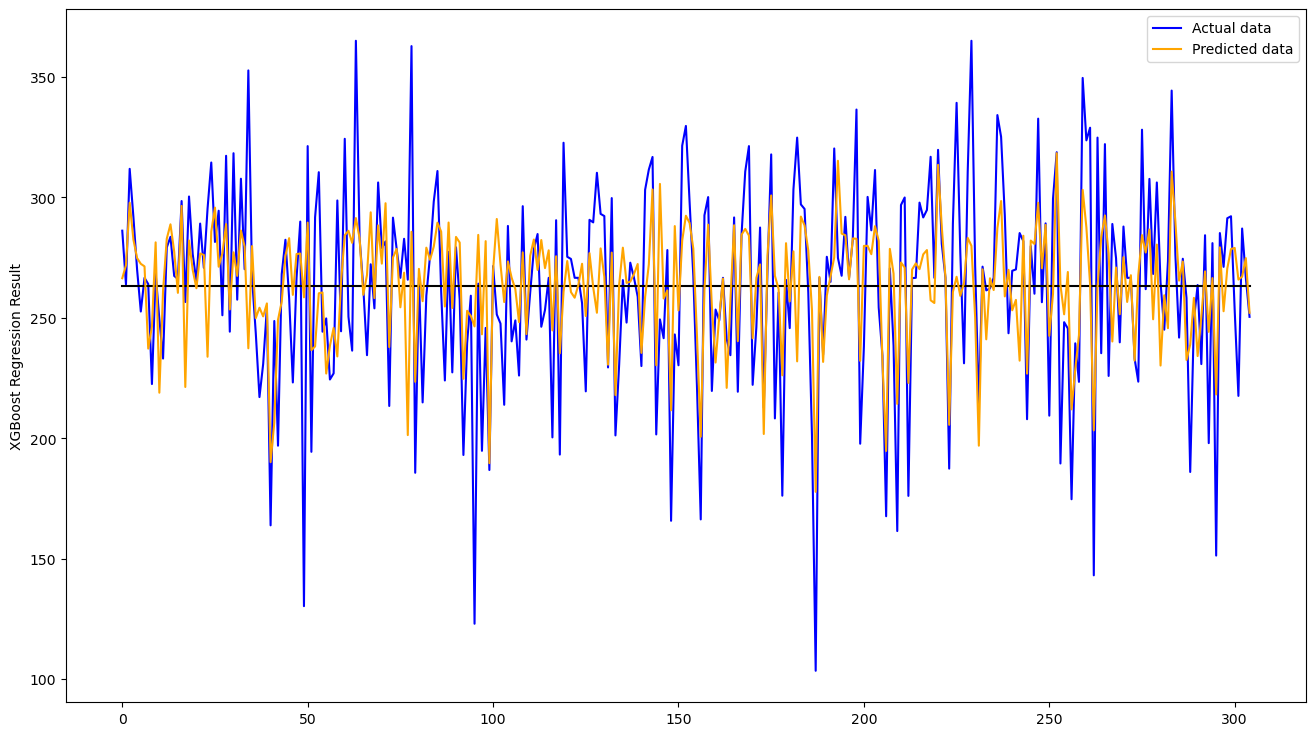

In [75]:
Axis = [y_val_inv[0].mean()] * len(y_val_inv[0])
plt.figure(figsize=(16, 9))
plt.ylabel('XGBoost Regression Result')
plt.plot(y_val_inv[0], 'blue', label='Actual data')
plt.plot(Axis, color="black")
plt.plot(xgbr_pred_inv[0], 'orange', label='Predicted data')
plt.legend()


# Neural Network

https://stackabuse.com/bytes/end-to-end-xgboost-regression-pipeline-with-scikit-learn/

https://xgboost.readthedocs.io/

In [76]:
# pip install xgboost

In [77]:
from optuna.integration import TFKerasPruningCallback
from optuna.trial import TrialState
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras import *
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from sklearn.preprocessing import RobustScaler, normalize
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [78]:
def NN_Model(trial):
    # We optimize the numbers of layers, their units and weight decay parameter.
    n_layers = trial.suggest_int("n_layers", 1, 6, step = 1)
    weight_decay = trial.suggest_float("weight_decay", 1e-10, 1e-3, log=True)
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-1, log=True)
    model = Sequential()
    model.add(Flatten())
    for i in range(n_layers):
        num_hidden = trial.suggest_int("n_units_l{}".format(i), 4, 4096, log=True)
        dropout = trial.suggest_uniform("Dropout_rate", 0.01, 0.80)
        activation = trial.suggest_categorical('activation', ["relu", "tanh", "linear"])
        model.add(
            Dense(
                num_hidden,
                activation=activation,
                kernel_regularizer=tf.keras.regularizers.l2(weight_decay),
            )
        )
        model.add(Dropout(dropout))
    model.add(
        Dense(1, kernel_regularizer=tf.keras.regularizers.l2(weight_decay))
    )
    model.compile(
      loss='mse',
      optimizer=Adam(learning_rate = learning_rate)
    )
    return model

In [79]:
EPOCHS = 30 # number of epocs per trial

def objective(trial):
    keras.backend.clear_session()
    # Generate our trial model.
    model = NN_Model(trial)

    # learning rate scheduler
    scheduler = ExponentialDecay(1e-3, 400*((len(X_train)*0.8)/16), 1e-5)
    lr = LearningRateScheduler(scheduler, verbose=0)

    # Fit the model on the training data.
    # The TFKerasPruningCallback checks for pruning condition every epoch.
    model.fit(
        X_train, y_train,
        batch_size=16,
        callbacks=[TFKerasPruningCallback(trial, "val_loss")],
        epochs=EPOCHS,
        validation_data=(X_val, y_val),
        verbose=1,
    )

    # Evaluate the model accuracy on the validation set.
    score = model.evaluate(X_val, y_val, verbose=0)
    return score

In [80]:
nn_study = optuna.create_study(direction="minimize", sampler=optuna.samplers.TPESampler(), pruner=optuna.pruners.HyperbandPruner())
nn_study.optimize(objective, n_trials=10)
pruned_trials = nn_study.get_trials(deepcopy=False, states=[TrialState.PRUNED])
complete_trials = nn_study.get_trials(deepcopy=False, states=[TrialState.COMPLETE])

[I 2023-05-10 14:18:20,386] A new study created in memory with name: no-name-068370b8-328c-4c3b-b87b-e89104b4f9f5


Epoch 1/30
155/155 [==============================] - 6s 13ms/step - loss: 0.0298 - val_loss: 0.0346
Epoch 2/30
155/155 [==============================] - 2s 10ms/step - loss: 0.0223 - val_loss: 0.0195
Epoch 3/30
155/155 [==============================] - 2s 10ms/step - loss: 0.0212 - val_loss: 0.0197
Epoch 4/30
155/155 [==============================] - 1s 9ms/step - loss: 0.0225 - val_loss: 0.0196
Epoch 5/30
155/155 [==============================] - 2s 10ms/step - loss: 0.0208 - val_loss: 0.0201
Epoch 6/30
155/155 [==============================] - 2s 10ms/step - loss: 0.0213 - val_loss: 0.0227
Epoch 7/30
155/155 [==============================] - 1s 9ms/step - loss: 0.0214 - val_loss: 0.0340
Epoch 8/30
155/155 [==============================] - 2s 10ms/step - loss: 0.0212 - val_loss: 0.0230
Epoch 9/30
155/155 [==============================] - 2s 10ms/step - loss: 0.0207 - val_loss: 0.0195
Epoch 10/30
155/155 [==============================] - 1s 9ms/step - loss: 0.0206 - val_loss:

[I 2023-05-10 14:19:12,013] Trial 0 finished with value: 0.01950499415397644 and parameters: {'n_layers': 6, 'weight_decay': 3.1470085271026455e-07, 'learning_rate': 0.001668495420741295, 'n_units_l0': 21, 'Dropout_rate': 0.08984343680837024, 'activation': 'tanh', 'n_units_l1': 3763, 'n_units_l2': 7, 'n_units_l3': 881, 'n_units_l4': 25, 'n_units_l5': 2019}. Best is trial 0 with value: 0.01950499415397644.


Epoch 1/30
155/155 [==============================] - 5s 10ms/step - loss: 201033808.0000 - val_loss: 0.0592
Epoch 2/30
155/155 [==============================] - 1s 8ms/step - loss: 0.2636 - val_loss: 0.0487
Epoch 3/30
155/155 [==============================] - 1s 8ms/step - loss: 0.1877 - val_loss: 0.0499
Epoch 4/30
155/155 [==============================] - 1s 7ms/step - loss: 0.1390 - val_loss: 0.0369
Epoch 5/30
155/155 [==============================] - 0s 3ms/step - loss: 0.1966 - val_loss: 0.0430
Epoch 6/30
155/155 [==============================] - 1s 3ms/step - loss: 3.2085 - val_loss: 0.1057
Epoch 7/30
155/155 [==============================] - 1s 4ms/step - loss: 31.2451 - val_loss: 0.1057
Epoch 8/30
155/155 [==============================] - 1s 3ms/step - loss: 1.5909 - val_loss: 0.1056
Epoch 9/30
155/155 [==============================] - 1s 3ms/step - loss: 0.8254 - val_loss: 0.1053
Epoch 10/30
155/155 [==============================] - 1s 4ms/step - loss: 0.8116 - val_lo

[I 2023-05-10 14:19:35,761] Trial 1 finished with value: 0.07745198160409927 and parameters: {'n_layers': 6, 'weight_decay': 1.6923976377203805e-09, 'learning_rate': 0.08290586991817676, 'n_units_l0': 11, 'Dropout_rate': 0.2570689661613924, 'activation': 'relu', 'n_units_l1': 261, 'n_units_l2': 45, 'n_units_l3': 227, 'n_units_l4': 326, 'n_units_l5': 364}. Best is trial 0 with value: 0.01950499415397644.


Epoch 1/30
155/155 [==============================] - 1s 4ms/step - loss: 1.3180 - val_loss: 0.0202
Epoch 2/30
155/155 [==============================] - 1s 3ms/step - loss: 0.0227 - val_loss: 0.0241
Epoch 3/30
155/155 [==============================] - 1s 5ms/step - loss: 0.0224 - val_loss: 0.0195
Epoch 4/30
155/155 [==============================] - 1s 4ms/step - loss: 0.0214 - val_loss: 0.0200
Epoch 5/30
155/155 [==============================] - 1s 5ms/step - loss: 0.0218 - val_loss: 0.0236
Epoch 6/30
155/155 [==============================] - 1s 4ms/step - loss: 0.0222 - val_loss: 0.0199
Epoch 7/30
155/155 [==============================] - 0s 3ms/step - loss: 0.0220 - val_loss: 0.0200
Epoch 8/30
155/155 [==============================] - 0s 3ms/step - loss: 0.0219 - val_loss: 0.0196
Epoch 9/30
155/155 [==============================] - 0s 3ms/step - loss: 0.0213 - val_loss: 0.0196
Epoch 10/30
155/155 [==============================] - 0s 3ms/step - loss: 0.0223 - val_loss: 0.0198

[I 2023-05-10 14:19:51,637] Trial 2 finished with value: 0.020376969128847122 and parameters: {'n_layers': 4, 'weight_decay': 8.723629476542255e-10, 'learning_rate': 0.004715557141776952, 'n_units_l0': 1629, 'Dropout_rate': 0.45760572076298395, 'activation': 'relu', 'n_units_l1': 5, 'n_units_l2': 11, 'n_units_l3': 3639}. Best is trial 0 with value: 0.01950499415397644.


Epoch 1/30
155/155 [==============================] - 6s 29ms/step - loss: 43501.0195 - val_loss: 29.7279
Epoch 2/30
154/155 [============================>.] - ETA: 0s - loss: 13189.9531

[I 2023-05-10 14:20:01,410] Trial 3 pruned. Trial was pruned at epoch 1.


Epoch 1/30
155/155 [==============================] - 2s 5ms/step - loss: 7671.7915 - val_loss: 1.2969
Epoch 2/30
155/155 [==============================] - 0s 3ms/step - loss: 116.9298 - val_loss: 0.2820
Epoch 3/30
155/155 [==============================] - 1s 3ms/step - loss: 32.2883 - val_loss: 0.2073
Epoch 4/30
155/155 [==============================] - 1s 3ms/step - loss: 11.7037 - val_loss: 0.1347
Epoch 5/30
155/155 [==============================] - 1s 4ms/step - loss: 5.8226 - val_loss: 0.0659
Epoch 6/30
155/155 [==============================] - 1s 4ms/step - loss: 2.9674 - val_loss: 0.0613
Epoch 7/30
155/155 [==============================] - 1s 4ms/step - loss: 1.6638 - val_loss: 0.0804
Epoch 8/30
155/155 [==============================] - 1s 3ms/step - loss: 1.0940 - val_loss: 0.0503
Epoch 9/30
155/155 [==============================] - 1s 3ms/step - loss: 0.7965 - val_loss: 0.0544
Epoch 10/30
155/155 [==============================] - 1s 4ms/step - loss: 0.6115 - val_loss:

[I 2023-05-10 14:20:19,057] Trial 4 finished with value: 0.02189016528427601 and parameters: {'n_layers': 1, 'weight_decay': 5.694045449298167e-05, 'learning_rate': 0.019289575368264734, 'n_units_l0': 191, 'Dropout_rate': 0.23856499811306967, 'activation': 'linear'}. Best is trial 0 with value: 0.01950499415397644.


Epoch 1/30
155/155 [==============================] - 9s 41ms/step - loss: 14.6498 - val_loss: 0.4075
Epoch 2/30
154/155 [============================>.] - ETA: 0s - loss: 0.5175

[I 2023-05-10 14:20:34,779] Trial 5 pruned. Trial was pruned at epoch 1.


Epoch 1/30
155/155 [==============================] - 2s 5ms/step - loss: 42630.2422 - val_loss: 5.2264
Epoch 2/30
138/155 [=========================>....] - ETA: 0s - loss: 20083.9668

[I 2023-05-10 14:20:37,583] Trial 6 pruned. Trial was pruned at epoch 1.


Epoch 1/30
155/155 [==============================] - 6s 16ms/step - loss: 0.1897 - val_loss: 0.0210
Epoch 2/30
155/155 [==============================] - 2s 13ms/step - loss: 0.0266 - val_loss: 0.0218
Epoch 3/30
155/155 [==============================] - 2s 12ms/step - loss: 0.0241 - val_loss: 0.0255
Epoch 4/30
155/155 [==============================] - ETA: 0s - loss: 0.0233

[I 2023-05-10 14:20:49,575] Trial 7 pruned. Trial was pruned at epoch 3.


Epoch 1/30
155/155 [==============================] - 6s 21ms/step - loss: 0.3067 - val_loss: 0.0458
Epoch 2/30
153/155 [============================>.] - ETA: 0s - loss: 0.1846

[I 2023-05-10 14:20:59,113] Trial 8 pruned. Trial was pruned at epoch 1.


Epoch 1/30
155/155 [==============================] - 2s 5ms/step - loss: 64553.0273 - val_loss: 0.5861
Epoch 2/30
155/155 [==============================] - 1s 4ms/step - loss: 3.5329 - val_loss: 0.5235
Epoch 3/30
155/155 [==============================] - 1s 4ms/step - loss: 0.4722 - val_loss: 0.4271
Epoch 4/30
155/155 [==============================] - 1s 4ms/step - loss: 0.3761 - val_loss: 0.3331
Epoch 5/30
155/155 [==============================] - 1s 4ms/step - loss: 0.2877 - val_loss: 0.2493
Epoch 6/30
155/155 [==============================] - 1s 4ms/step - loss: 0.2115 - val_loss: 0.1800
Epoch 7/30
155/155 [==============================] - 1s 4ms/step - loss: 0.1499 - val_loss: 0.1263
Epoch 8/30
155/155 [==============================] - 1s 4ms/step - loss: 0.1040 - val_loss: 0.0870
Epoch 9/30
155/155 [==============================] - 1s 3ms/step - loss: 0.0716 - val_loss: 0.0600
Epoch 10/30
155/155 [==============================] - 1s 4ms/step - loss: 0.0499 - val_loss: 0.

[I 2023-05-10 14:21:18,962] Trial 9 finished with value: 0.019434545189142227 and parameters: {'n_layers': 1, 'weight_decay': 3.226421423310336e-10, 'learning_rate': 0.08562628331224215, 'n_units_l0': 629, 'Dropout_rate': 0.1523975606120484, 'activation': 'relu'}. Best is trial 9 with value: 0.019434545189142227.


In [81]:
plot_optimization_history(nn_study)

In [82]:
nn_study.best_trial.params

{'n_layers': 1,
 'weight_decay': 3.226421423310336e-10,
 'learning_rate': 0.08562628331224215,
 'n_units_l0': 629,
 'Dropout_rate': 0.1523975606120484,
 'activation': 'relu'}

https://stackoverflow.com/questions/19201290/how-to-save-a-dictionary-to-a-file

In [83]:
nn_study.best_trial.params['n_units_l0']

629

In [84]:
np.save(f"G:/My Drive/DataMining/POC/LungCancer/local/Parameter/Transform/nn_parameter.npy", nn_study.best_trial.params)

In [86]:
nn_mod = Sequential()
nn_mod.add(Flatten())
#layer 1
nn_mod.add(
            Dense(
                units = nn_study.best_trial.params['n_units_l0'],
                activation=nn_study.best_trial.params["activation"],
                kernel_regularizer=tf.keras.regularizers.l2(nn_study.best_trial.params["weight_decay"]),
            )
        )
nn_mod.add(Dropout(nn_study.best_trial.params['Dropout_rate']))

#output
nn_mod.add(
        Dense(1, kernel_regularizer=tf.keras.regularizers.l2(nn_study.best_trial.params["weight_decay"]))
    )
nn_mod.compile(
      loss='mse',
      optimizer=Adam(learning_rate = nn_study.best_trial.params['learning_rate'])
    )


In [87]:
history = nn_mod.fit(
        X_train, y_train,
        batch_size=16,
        epochs=EPOCHS,
        validation_data=(X_val, y_val),
        verbose=1,
    )

Epoch 1/30
155/155 [==============================] - 1s 2ms/step - loss: 46903.8359 - val_loss: 0.0412
Epoch 2/30
155/155 [==============================] - 0s 2ms/step - loss: 5.7749 - val_loss: 0.0366
Epoch 3/30
155/155 [==============================] - 0s 2ms/step - loss: 0.8079 - val_loss: 0.0557
Epoch 4/30
155/155 [==============================] - 0s 2ms/step - loss: 0.0317 - val_loss: 0.0440
Epoch 5/30
155/155 [==============================] - 0s 1ms/step - loss: 0.0292 - val_loss: 0.0366
Epoch 6/30
155/155 [==============================] - 0s 1ms/step - loss: 0.0290 - val_loss: 0.0345
Epoch 7/30
155/155 [==============================] - 0s 1ms/step - loss: 0.0273 - val_loss: 0.0309
Epoch 8/30
155/155 [==============================] - 0s 1ms/step - loss: 0.0272 - val_loss: 0.0281
Epoch 9/30
155/155 [==============================] - 0s 1ms/step - loss: 0.0280 - val_loss: 0.0321
Epoch 10/30
155/155 [==============================] - 0s 1ms/step - loss: 0.0280 - val_loss: 0.

In [88]:
nn_mod.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 36)                0         
                                                                 
 dense_3 (Dense)             (None, 629)               23273     
                                                                 
 dropout_2 (Dropout)         (None, 629)               0         
                                                                 
 dense_4 (Dense)             (None, 1)                 630       
                                                                 
Total params: 23,903
Trainable params: 23,903
Non-trainable params: 0
_________________________________________________________________


In [89]:
nn_pred = nn_mod.predict(X_val)

10/10 [==============================] - 0s 892us/step


## Evaluate

In [90]:
y_val_inv = scaler_single.inverse_transform(np.array(y_val).reshape(1, -1))
nn_pred_inv = scaler_single.inverse_transform(np.array(nn_pred).reshape(1, -1))


In [91]:
#evaluating the model with the following metrics
#mean squared error
nn_mse=mean_squared_error(nn_pred_inv[0], y_val_inv[0])     
#mean absolute error     
nn_mae=mean_absolute_error(nn_pred_inv[0], y_val_inv[0])  
#root mean squared error      
nn_rmse=np.sqrt(mean_squared_error(nn_pred_inv[0], y_val_inv[0]))
#r2 score
nn_r2 = r2_score(nn_pred_inv[0], y_val_inv[0])
print(f'mse: {nn_mse}')
print(f'mae: {nn_mae}')
print(f'rmse: {nn_rmse}')
print(f"R-Squared: {nn_r2}")

mse: 1745.0062539503185
mae: 32.56828703469705
rmse: 41.773272004360855
R-Squared: -12.213023674392344


In [92]:
nn_df =pd.DataFrame({"mse": nn_mse,"mae": nn_mae,"rmse": nn_rmse,  "r2": nn_r2, "deviation": deviation_function(y_val_inv[0], nn_pred_inv[0])},index=['Neural Network'])

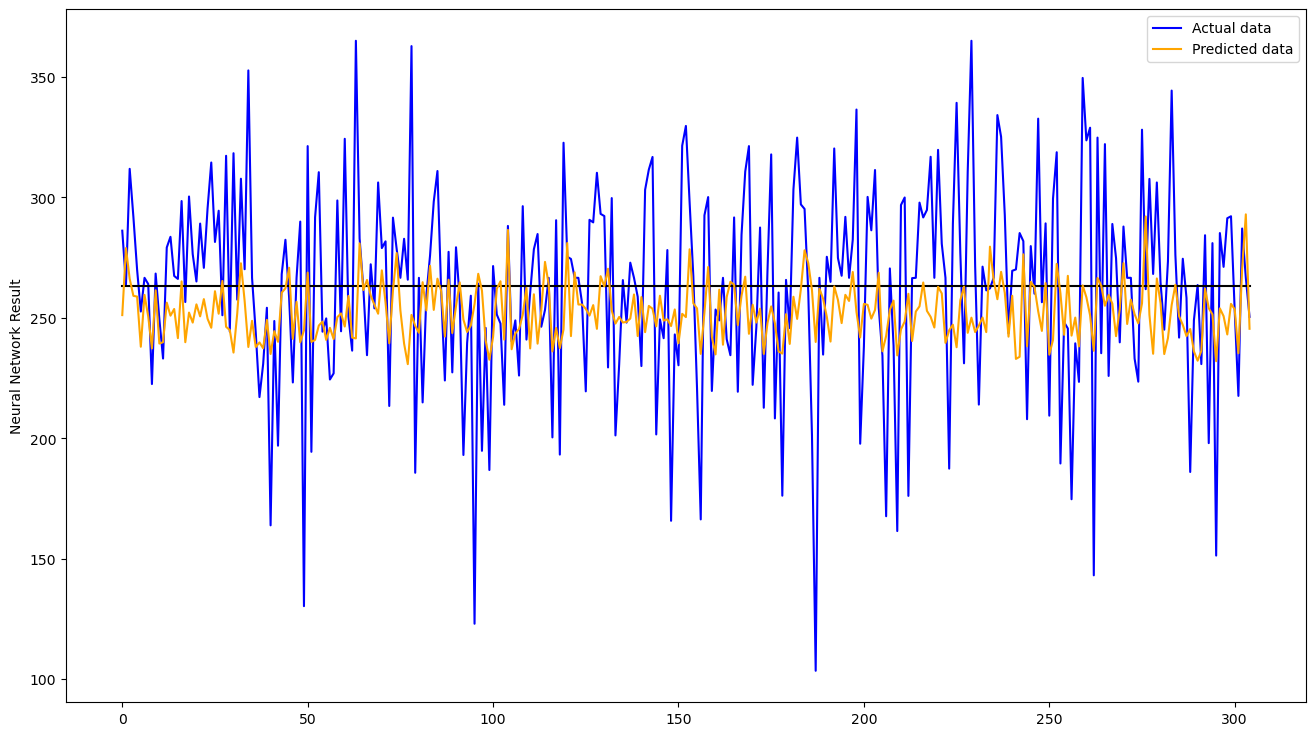

In [93]:
Axis = [y_val_inv[0].mean()] * len(y_val_inv[0])
plt.figure(figsize=(16, 9))
plt.ylabel('Neural Network Result')
plt.plot(y_val_inv[0], 'blue', label='Actual data')
plt.plot(Axis, color="black")
plt.plot(nn_pred_inv[0], 'orange', label='Predicted data')
plt.legend()


# Comparision

https://stats.stackexchange.com/questions/183265/what-does-negative-r-squared-mean#:~:text=It%20means%20you've%20done,least%20squares%20regression%20line%20itself.

https://www.kaggle.com/questions-and-answers/267943

In [94]:
df_evaluation = pd.concat([lr_df, nn_df, dtr_df, rfr_df, xgbr_df]) 
df_evaluation

,mse,mae,rmse,r2,deviation
Linear Regression,1187.548194,26.299447,34.460821,-0.834144,0.103238
Neural Network,1745.006254,32.568287,41.773272,-12.213024,0.131150
Decision Tree Regression,2548.824004,37.377926,50.485879,-0.188115,0.151101
Random Forest Regression,984.697037,23.789021,31.379883,-0.628093,0.092841
XGBoost Regression,1010.193288,24.305385,31.783538,-0.793536,0.094820


In [95]:
df_evaluation.to_csv("G:/My Drive/DataMining/POC/LungCancer/local/Evaluation/Transform/optuna.csv")

# Save Model

In [96]:
import pickle
lr_filename = 'G:/My Drive/DataMining/POC/LungCancer/local/Model/Transform/lr_Optuna.h5'
pickle.dump(lr_model, open(lr_filename, 'wb'))
# svr_filename = 'G:/My Drive/DataMining/POC/LungCancer/local/Model/Transform/svr_Optuna.h5'
# pickle.dump(svr_model, open(svr_filename, 'wb'))
rfr_filename = 'G:/My Drive/DataMining/POC/LungCancer/local/Model/Transform/rfr_Optuna.h5'
pickle.dump(rfr_model, open(rfr_filename, 'wb'))
dtr_filename = 'G:/My Drive/DataMining/POC/LungCancer/local/Model/Transform/dtr_Optuna.h5'
pickle.dump(dtr_model, open(dtr_filename, 'wb'))
xgbr_filename = 'G:/My Drive/DataMining/POC/LungCancer/local/Model/Transform/xgbr_Optuna.h5'
pickle.dump(xgbr_model, open(xgbr_filename, 'wb'))
nn_mod.save(f'G:/My Drive/DataMining/POC/LungCancer/local/Model/Transform/nn_Optuna.h5')